<a href="https://colab.research.google.com/github/Sa-Fi/Crop-pest-and-disease-detection/blob/main/Runing_Model_on_scaled_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

#upload the kaggle json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d safiullah007/leaf-disease


100% 3.76G/3.76G [03:25<00:00, 22.4MB/s]
100% 3.76G/3.76G [03:25<00:00, 19.6MB/s]


In [2]:

# unzip the file
import zipfile
zip_ref = zipfile.ZipFile('/content/leaf-disease.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score
import ipywidgets as widgets
import io
from PIL import Image
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
import os
import numpy as np
from sklearn.preprocessing import LabelEncoder
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

In [4]:
def normalize_image(image):
    image = image.astype(np.float32)
    image = (image - np.min(image)) / (np.max(image) - np.min(image))
    return image

Normalized Image Pixel Values:
[[[1.         0.99607843 1.        ]
  [0.99607843 0.99215686 1.        ]
  [1.         1.         1.        ]
  ...
  [0.8784314  0.9019608  0.8117647 ]
  [0.84705883 0.85882354 0.77254903]
  [0.8156863  0.83137256 0.73333335]]

 [[0.99215686 0.9882353  0.99607843]
  [0.99215686 0.99215686 0.99215686]
  [1.         1.         1.        ]
  ...
  [0.9372549  0.95686275 0.8745098 ]
  [0.8745098  0.8980392  0.80784315]
  [0.84313726 0.8666667  0.76862746]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         0.99607843]
  ...
  [0.9529412  0.9882353  0.9098039 ]
  [0.9137255  0.9529412  0.8627451 ]
  [0.8745098  0.9137255  0.8235294 ]]

 ...

 [[0.38039216 0.39607844 0.29803923]
  [0.38039216 0.4        0.29411766]
  [0.37254903 0.39215687 0.28627452]
  ...
  [0.31764707 0.31764707 0.27058825]
  [0.3019608  0.29803923 0.24313726]
  [0.29803923 0.29803923 0.23529412]]

 [[0.42352942 0.4392157  0.3647059 ]
  [0.4

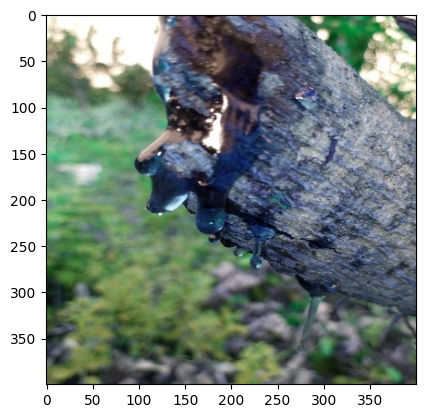

In [ ]:

import cv2
import numpy as np

# Define the path to the input image
input_image_path = '/content/CCMT Dataset/Cashew/gumosis/gumosis103_.jpg'  # Replace with the path to your input image

# Load the input image
image = cv2.imread(input_image_path)

if image is not None:
    # Define the normalization function (scaling to [0, 1])
    def normalize_image(image):
        image = image.astype(np.float32)
        image = (image - np.min(image)) / (np.max(image) - np.min(image))
        return image

    # Perform normalization
    normalized_image = normalize_image(image)

    # Display the normalized image
    plt.imshow(normalized_image)

    # Display pixel values of the normalized image
    print("Normalized Image Pixel Values:")
    print(normalized_image)
else:
    print("Failed to load the input image.")

Normalize the dataset program


In [ ]:
import os
import cv2
from tqdm import tqdm

# Define classes and subclasses
classes = ['Cashew', 'Cassava', 'Maize', 'Tomato']
subclasses = {
    'Cashew': ['anthracnose', 'gumosis', 'healthy', 'leaf miner', 'red rust'],
    'Cassava': ['bacterial blight', 'brown spot', 'green mite', 'healthy', 'mosaic'],
    'Maize': ['fall armyworm', 'grasshoper', 'healthy', 'leaf beetle', 'leaf blight', 'leaf spot', 'streak virus'],
    'Tomato': ['healthy', 'leaf blight', 'leaf curl', 'septoria leaf spot', 'verticulium wilt']
}

# Define the input and output folders
input_root_folder = '/content/CCMT Dataset'
output_root_folder = '/content/drive/MyDrive/CCMT(scaling_dataset)'

# Create the output folder if it doesn't exist
if not os.path.exists(output_root_folder):
    os.makedirs(output_root_folder)

# Create a progress bar
pbar = tqdm(total=len(classes) * len(subclasses))

# Read images, normalize, and save to the output folder
for class_name in classes:
    for subclass_name in subclasses[class_name]:
        input_folder_path = os.path.join(input_root_folder, class_name, subclass_name)
        output_folder_path = os.path.join(output_root_folder, class_name, subclass_name)

        # Create the output folder for the current subclass
        if not os.path.exists(output_folder_path):
            os.makedirs(output_folder_path)

        for filename in os.listdir(input_folder_path):
            image_path = os.path.join(input_folder_path, filename)
            image = cv2.imread(image_path)

            if image is not None:
                # Normalize the image
                normalized_image = normalize_image(image)

                # Save the normalized image to the output folder with the same filename
                output_image_path = os.path.join(output_folder_path, filename)
                cv2.imwrite(output_image_path, (normalized_image).astype(np.float32))
                pbar.update(1)
            else:
                print(f"Skipping file: {image_path}")

pbar.close()

print("Normalization and saving complete.")


15049it [04:07, 65.27it/s]

Skipping file: /content/CCMT Dataset/Maize/healthy/healthy18_.jpg


15071it [04:07, 66.17it/s]

Skipping file: /content/CCMT Dataset/Maize/healthy/healthy88_.jpg


15354it [04:15, 35.59it/s]

Skipping file: /content/CCMT Dataset/Maize/leaf beetle/leaf beetle573_.jpg


15513it [04:17, 64.59it/s]

Skipping file: /content/CCMT Dataset/Maize/leaf beetle/leaf beetle207_.jpg


15560it [04:18, 68.62it/s]

Skipping file: /content/CCMT Dataset/Maize/leaf beetle/leaf beetle208_.jpg


15653it [04:19, 67.95it/s]

Skipping file: /content/CCMT Dataset/Maize/leaf beetle/leaf beetle458_.jpg
Skipping file: /content/CCMT Dataset/Maize/leaf beetle/leaf beetle910_.jpg


15683it [04:19, 66.33it/s]

Skipping file: /content/CCMT Dataset/Maize/leaf beetle/leaf beetle90_.jpg


15849it [04:22, 69.79it/s]

Skipping file: /content/CCMT Dataset/Maize/leaf beetle/leaf beetle691_.jpg


16063it [04:25, 59.51it/s]

Skipping file: /content/CCMT Dataset/Maize/leaf beetle/leaf beetle798_.jpg
Skipping file: /content/CCMT Dataset/Maize/leaf beetle/leaf beetle690_.jpg
Skipping file: /content/CCMT Dataset/Maize/leaf beetle/leaf beetle326_.jpg


16168it [04:27, 51.78it/s]

Skipping file: /content/CCMT Dataset/Maize/leaf blight/leaf blight746_.jpg


16490it [04:33, 59.46it/s]

Skipping file: /content/CCMT Dataset/Maize/leaf blight/leaf blight913_.jpg


16787it [04:37, 67.46it/s]

Skipping file: /content/CCMT Dataset/Maize/leaf blight/leaf blight830_.jpg
Skipping file: /content/CCMT Dataset/Maize/leaf blight/leaf blight37_.jpg


16953it [04:40, 54.11it/s]

Skipping file: /content/CCMT Dataset/Maize/leaf blight/leaf blight590_.jpg


16989it [04:40, 50.97it/s]

Skipping file: /content/CCMT Dataset/Maize/leaf blight/leaf blight453_.jpg
Skipping file: /content/CCMT Dataset/Maize/leaf blight/leaf blight98_.jpg


17126it [04:43, 57.18it/s]

Skipping file: /content/CCMT Dataset/Maize/leaf blight/leaf blight667_.jpg


17309it [04:46, 65.31it/s]

Skipping file: /content/CCMT Dataset/Maize/leaf spot/leaf spot272_.jpg


17413it [04:47, 71.20it/s]

Skipping file: /content/CCMT Dataset/Maize/leaf spot/leaf spot799_.jpg


17468it [04:48, 67.41it/s]

Skipping file: /content/CCMT Dataset/Maize/leaf spot/leaf spot64_.jpg


17555it [04:49, 72.32it/s]

Skipping file: /content/CCMT Dataset/Maize/leaf spot/leaf spot425_.jpg


17852it [04:54, 59.29it/s]

Skipping file: /content/CCMT Dataset/Maize/leaf spot/leaf spot724_.jpg
Skipping file: /content/CCMT Dataset/Maize/leaf spot/leaf spot958_.jpg


18114it [04:58, 63.84it/s]

Skipping file: /content/CCMT Dataset/Maize/leaf spot/leaf spot353_.jpg


18314it [05:01, 73.23it/s]

Skipping file: /content/CCMT Dataset/Maize/leaf spot/leaf spot187_.jpg


18346it [05:02, 71.41it/s]

Skipping file: /content/CCMT Dataset/Maize/leaf spot/leaf spot497_.jpg


18362it [05:02, 70.67it/s]

Skipping file: /content/CCMT Dataset/Maize/leaf spot/leaf spot882_.jpg


18580it [05:05, 68.88it/s]

Skipping file: /content/CCMT Dataset/Maize/streak virus/streak virus998_.jpg


18612it [05:05, 70.68it/s]

Skipping file: /content/CCMT Dataset/Maize/streak virus/streak virus701_.jpg
Skipping file: /content/CCMT Dataset/Maize/streak virus/streak virus422_.jpg


18787it [05:08, 64.11it/s]

Skipping file: /content/CCMT Dataset/Maize/streak virus/streak virus774_.jpg


18832it [05:09, 52.85it/s]

Skipping file: /content/CCMT Dataset/Maize/streak virus/streak virus627_.jpg


19000it [05:12, 54.71it/s]

Skipping file: /content/CCMT Dataset/Maize/streak virus/streak virus119_.jpg


19335it [05:17, 71.07it/s]

Skipping file: /content/CCMT Dataset/Maize/streak virus/streak virus486_.jpg


19546it [05:20, 64.78it/s]

Skipping file: /content/CCMT Dataset/Tomato/healthy/healthy77_.jpg


19739it [05:22, 78.10it/s]

Skipping file: /content/CCMT Dataset/Tomato/healthy/healthy443_.jpg


20085it [05:30, 31.93it/s]

Skipping file: /content/CCMT Dataset/Tomato/leaf blight/leaf blight645_.jpg


20533it [05:39, 50.18it/s]

Skipping file: /content/CCMT Dataset/Tomato/leaf blight/leaf blight998_.jpg


20599it [05:40, 54.35it/s]

Skipping file: /content/CCMT Dataset/Tomato/leaf blight/leaf blight72_.jpg


20611it [05:40, 54.80it/s]

Skipping file: /content/CCMT Dataset/Tomato/leaf blight/leaf blight471_.jpg


20700it [05:42, 49.53it/s]

Skipping file: /content/CCMT Dataset/Tomato/leaf blight/leaf blight814_.jpg


20767it [05:43, 65.12it/s]

Skipping file: /content/CCMT Dataset/Tomato/leaf blight/leaf blight558_.jpg


20919it [05:45, 72.96it/s]

Skipping file: /content/CCMT Dataset/Tomato/leaf blight/leaf blight1232_.jpg


21205it [05:49, 63.54it/s]

Skipping file: /content/CCMT Dataset/Tomato/leaf curl/leaf curl354_.jpg
Skipping file: /content/CCMT Dataset/Tomato/leaf curl/leaf curl43_.jpg


21356it [05:52, 70.03it/s]

Skipping file: /content/CCMT Dataset/Tomato/leaf curl/leaf curl186_.jpg


21630it [05:57, 54.45it/s]

Skipping file: /content/CCMT Dataset/Tomato/leaf curl/leaf curl271_.jpg


25170it [06:52, 60.96it/s]

Normalization and saving complete.


In [5]:
# Define classes and subclasses
classes = ['Cashew', 'Cassava', 'Maize', 'Tomato']
subclasses = {
    'Cashew': ['anthracnose', 'gumosis', 'healthy', 'leaf miner', 'red rust'],
    'Cassava': ['bacterial blight', 'brown spot', 'green mite', 'healthy', 'mosaic'],
    'Maize': ['fall armyworm', 'grasshopper', 'healthy', 'leaf beetle', 'leaf blight', 'leaf spot', 'streak virus'],
    'Tomato': ['healthy', 'leaf blight', 'leaf curl', 'septoria leaf spot', 'verticulium wilt']
}

data = []  # To store images as arrays
labels = []  # To store labels
progress_bar = tqdm(total=len(classes) * len(subclasses))
main_folder = '/content/Augmented_CCMT data/Augmented_CCMT data'

# Read images and assign labels
for class_name in classes:
    for subclass_name in subclasses[class_name]:
        folder_path = os.path.join(main_folder, class_name, subclass_name)
        for filename in os.listdir(folder_path):
           # if filename.endswith('.jpg') or filename.endswith('.png'):
                image_path = os.path.join(folder_path, filename)
                # image = Image.open(image_path)
                image = cv2.imread(image_path)
                if image is not None:
                  image = cv2.resize(image,(150,150))
                  image_array = np.array(image)
                  image_array = normalize_image(image)
                  data.append(image_array)
                  labels.append(class_name + '_' + subclass_name)
                  progress_bar.update(1)
                else:
                  print(f"Skipping file: {image_path}")
progress_bar.close()

# Convert 'data' and 'labels' lists to NumPy arrays
data = np.array(data)
labels = np.array(labels)


31186it [01:22, 424.83it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/healthy/healthy88_.jpg


31920it [01:24, 423.37it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/healthy/healthy18_.jpg


33133it [01:26, 421.64it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/leaf beetle/leaf beetle573_.jpg


33605it [01:28, 419.92it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/leaf beetle/leaf beetle326_.jpg


33734it [01:28, 422.34it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/leaf beetle/leaf beetle458_.jpg


33951it [01:28, 424.95it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/leaf beetle/leaf beetle690_.jpg
Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/leaf beetle/leaf beetle208_.jpg


34123it [01:29, 421.52it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/leaf beetle/leaf beetle207_.jpg


34817it [01:30, 421.47it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/leaf beetle/leaf beetle910_.jpg


34947it [01:31, 424.46it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/leaf beetle/leaf beetle798_.jpg


35033it [01:31, 418.74it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/leaf beetle/leaf beetle691_.jpg


35205it [01:31, 422.19it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/leaf beetle/leaf beetle90_.jpg


35450it [01:32, 390.94it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/leaf blight/leaf blight37_.jpg


36155it [01:34, 383.90it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/leaf blight/leaf blight746_.jpg


36307it [01:34, 369.38it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/leaf blight/leaf blight453_.jpg


36924it [01:36, 373.03it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/leaf blight/leaf blight913_.jpg
Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/leaf blight/leaf blight590_.jpg


37192it [01:37, 375.21it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/leaf blight/leaf blight98_.jpg


37499it [01:37, 372.14it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/leaf blight/leaf blight830_.jpg


37727it [01:38, 371.36it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/leaf blight/leaf blight667_.jpg


37842it [01:38, 375.27it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/leaf spot/leaf spot882_.jpg
Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/leaf spot/leaf spot958_.jpg


38416it [01:40, 378.67it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/leaf spot/leaf spot497_.jpg


38648it [01:40, 376.55it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/leaf spot/leaf spot724_.jpg


38996it [01:41, 374.31it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/leaf spot/leaf spot187_.jpg


39227it [01:42, 380.68it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/leaf spot/leaf spot64_.jpg


39343it [01:42, 378.46it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/leaf spot/leaf spot425_.jpg


39810it [01:44, 376.95it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/leaf spot/leaf spot353_.jpg
Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/leaf spot/leaf spot799_.jpg


40118it [01:44, 374.38it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/leaf spot/leaf spot272_.jpg


40463it [01:45, 370.89it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/streak virus/streak virus119_.jpg


40616it [01:46, 372.96it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/streak virus/streak virus486_.jpg


40730it [01:46, 371.64it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/streak virus/streak virus774_.jpg


41153it [01:47, 375.04it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/streak virus/streak virus627_.jpg


41834it [01:49, 366.06it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/streak virus/streak virus701_.jpg
Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/streak virus/streak virus998_.jpg


42447it [01:51, 374.15it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Maize/streak virus/streak virus422_.jpg


43524it [01:53, 414.31it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Tomato/healthy/healthy443_.jpg


43904it [01:54, 414.52it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Tomato/healthy/healthy77_.jpg


45027it [01:57, 381.66it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Tomato/leaf blight/leaf blight645_.jpg


45381it [01:58, 384.44it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Tomato/leaf blight/leaf blight72_.jpg


45773it [01:59, 383.26it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Tomato/leaf blight/leaf blight814_.jpg
Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Tomato/leaf blight/leaf blight998_.jpg


45930it [01:59, 384.78it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Tomato/leaf blight/leaf blight471_.jpg
Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Tomato/leaf blight/leaf blight558_.jpg


46947it [02:02, 381.44it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Tomato/leaf blight/leaf blight1232_.jpg


48025it [02:05, 409.53it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Tomato/leaf curl/leaf curl186_.jpg


48915it [02:07, 414.56it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Tomato/leaf curl/leaf curl354_.jpg
Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Tomato/leaf curl/leaf curl43_.jpg


49127it [02:07, 418.04it/s]

Skipping file: /content/Augmented_CCMT data/Augmented_CCMT data/Tomato/leaf curl/leaf curl271_.jpg


54602it [02:22, 383.26it/s]


In [7]:
data[0]

array([[[0.9506726 , 0.9865471 , 0.9551569 ],
        [0.9551569 , 0.9910314 , 0.9596413 ],
        [0.94170403, 0.9910314 , 0.9551569 ],
        ...,
        [0.9551569 , 0.9955157 , 0.9506726 ],
        [0.9551569 , 0.9955157 , 0.9506726 ],
        [0.9551569 , 0.9955157 , 0.9506726 ]],

       [[0.9596413 , 1.        , 0.9551569 ],
        [0.9506726 , 0.9910314 , 0.9506726 ],
        [0.94170403, 0.9910314 , 0.9551569 ],
        ...,
        [0.9551569 , 0.9910314 , 0.94618833],
        [0.9551569 , 0.9955157 , 0.9506726 ],
        [0.9551569 , 0.9955157 , 0.9506726 ]],

       [[0.9551569 , 0.9955157 , 0.9506726 ],
        [0.9596413 , 1.        , 0.9551569 ],
        [0.93721974, 0.9865471 , 0.9506726 ],
        ...,
        [0.9641256 , 1.        , 0.9506726 ],
        [0.9551569 , 0.9910314 , 0.94618833],
        [0.9596413 , 0.9955157 , 0.9506726 ]],

       ...,

       [[0.75336325, 0.79820627, 0.7443946 ],
        [0.75784755, 0.80269057, 0.7488789 ],
        [0.75336325, 0

In [8]:
labels[0]

'Cashew_anthracnose'

Text(0.5, 1.0, 'Cashew_anthracnose')

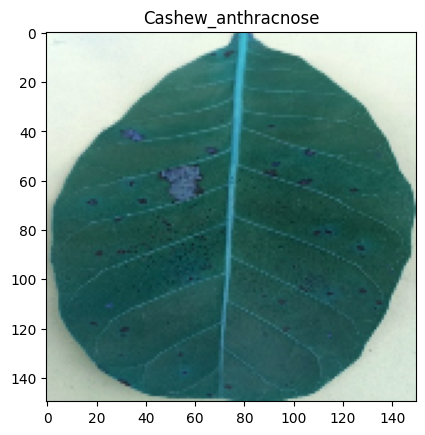

In [10]:
plt.imshow(data[0])
plt.title(labels[0])

In [11]:
np.save('/content/drive/MyDrive/data store/scaling data/data_scaling.npy', data)

In [13]:
import numpy as np

# Save data and labels to disk

np.save('/content/drive/MyDrive/data store/scaling data/labels_scaling.npy', labels)

In [ ]:
loaded_data = np.load('/content/drive/MyDrive/data store/data.npy')
loaded_labels = np.load('/content/drive/MyDrive/data store/labels.npy')

In [12]:
len(data)

54602

In [13]:
data[0]

array([[[0.9506726 , 0.9865471 , 0.9551569 ],
        [0.9551569 , 0.9910314 , 0.9596413 ],
        [0.94170403, 0.9910314 , 0.9551569 ],
        ...,
        [0.9551569 , 0.9955157 , 0.9506726 ],
        [0.9551569 , 0.9955157 , 0.9506726 ],
        [0.9551569 , 0.9955157 , 0.9506726 ]],

       [[0.9596413 , 1.        , 0.9551569 ],
        [0.9506726 , 0.9910314 , 0.9506726 ],
        [0.94170403, 0.9910314 , 0.9551569 ],
        ...,
        [0.9551569 , 0.9910314 , 0.94618833],
        [0.9551569 , 0.9955157 , 0.9506726 ],
        [0.9551569 , 0.9955157 , 0.9506726 ]],

       [[0.9551569 , 0.9955157 , 0.9506726 ],
        [0.9596413 , 1.        , 0.9551569 ],
        [0.93721974, 0.9865471 , 0.9506726 ],
        ...,
        [0.9641256 , 1.        , 0.9506726 ],
        [0.9551569 , 0.9910314 , 0.94618833],
        [0.9596413 , 0.9955157 , 0.9506726 ]],

       ...,

       [[0.75336325, 0.79820627, 0.7443946 ],
        [0.75784755, 0.80269057, 0.7488789 ],
        [0.75336325, 0

Text(0.5, 1.0, 'Cashew_anthracnose')

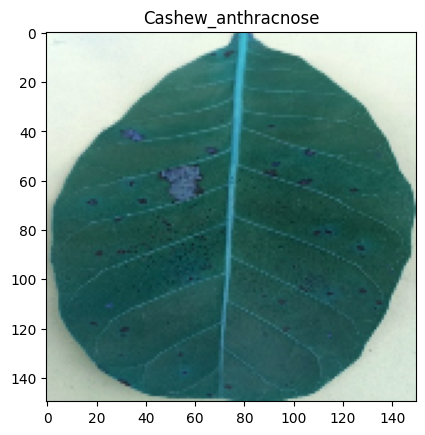

In [14]:
plt.imshow(data[0])
plt.title(labels[0])

In [6]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
labels

array([ 0,  0,  0, ..., 21, 21, 21])

In [7]:
x = (data)
y = (labels)
print("type of x independent varible which contain images :",type(x))
print("type of y dependent variable which contain the image label (with mask/without mask)",type(y))

type of x independent varible which contain images : <class 'numpy.ndarray'>
type of y dependent variable which contain the image label (with mask/without mask) <class 'numpy.ndarray'>


In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=2)

In [9]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test_encoded = encoder.fit_transform(y_test.reshape(-1, 1)).toarray()

In [10]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(64,activation = 'relu'))
model.add(Dense(22,activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:

history = model.fit(x_train,
                    y_train_encoded,
                    validation_split = 0.1,
                    epochs = 10)

Epoch 1/10
1229/1229 [==============================] - 24s 10ms/step - loss: 2.2186 - accuracy: 0.3032 - val_loss: 1.8732 - val_accuracy: 0.4179
Epoch 2/10
1229/1229 [==============================] - 10s 8ms/step - loss: 1.6117 - accuracy: 0.4846 - val_loss: 1.4193 - val_accuracy: 0.5395
Epoch 3/10
1229/1229 [==============================] - 10s 8ms/step - loss: 1.3406 - accuracy: 0.5586 - val_loss: 1.2694 - val_accuracy: 0.5724
Epoch 4/10
1229/1229 [==============================] - 10s 8ms/step - loss: 1.1595 - accuracy: 0.6107 - val_loss: 1.1345 - val_accuracy: 0.6150
Epoch 5/10
1229/1229 [==============================] - 10s 8ms/step - loss: 1.0365 - accuracy: 0.6479 - val_loss: 1.1257 - val_accuracy: 0.6152
Epoch 6/10
1229/1229 [==============================] - 10s 8ms/step - loss: 0.9454 - accuracy: 0.6753 - val_loss: 1.0634 - val_accuracy: 0.6411
Epoch 7/10
1229/1229 [==============================] - 10s 8ms/step - loss: 0.8772 - accuracy: 0.6972 - val_loss: 1.0932 - val_a

In [12]:

from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model

# Create the InceptionV3 model without top (fully connected layers)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Add your own classification layers on top of the InceptionV3 model
flat_layer = Flatten()(base_model.output)
output_layer = Dense(22, activation='softmax')(flat_layer)

# Create a new model combining InceptionV3 and the classification layers
model = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train_encoded, validation_split=0.1, epochs=50)

87910968/87910968 [==============================] - 5s 0us/step
Epoch 1/50
1229/1229 [==============================] - 97s 51ms/step - loss: 1.2904 - accuracy: 0.5994 - val_loss: 1.1305 - val_accuracy: 0.6253
Epoch 2/50
1229/1229 [==============================] - 58s 48ms/step - loss: 0.7009 - accuracy: 0.7527 - val_loss: 2.1794 - val_accuracy: 0.5113
Epoch 3/50
1229/1229 [==============================] - 59s 48ms/step - loss: 0.5977 - accuracy: 0.7884 - val_loss: 1.1570 - val_accuracy: 0.6638
Epoch 4/50
1229/1229 [==============================] - 59s 48ms/step - loss: 0.5253 - accuracy: 0.8106 - val_loss: 0.9459 - val_accuracy: 0.7420
Epoch 5/50
1229/1229 [==============================] - 59s 48ms/step - loss: 0.4648 - accuracy: 0.8352 - val_loss: 0.6415 - val_accuracy: 0.7846
Epoch 6/50
1229/1229 [==============================] - 59s 48ms/step - loss: 0.4045 - accuracy: 0.8536 - val_loss: 3.6335 - val_accuracy: 0.5715
Epoch 7/50
1229/1229 [==============================] - 60s

In [13]:
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
def accuracy_curve():
  h = history
#plot the accuracy value
  plt.plot(h.history['accuracy'],label='train accuracy')
  plt.plot(h.history['val_accuracy'],label = 'validation accuracy')
  plt.legend()
  plt.show()

def loss_curve():
  #plot the loss value
    h = history
    plt.plot(h.history['loss'],label = 'train loss')
    plt.plot(h.history['val_loss'],label = 'validation loss')
    plt.legend()
    plt.show()
def performance_measure():

  # Make predictions on the test data
  y_pred = model.predict(x_test)

  # Convert one-hot encoded predictions back to class labels
  y_pred_labels = np.argmax(y_pred, axis=1)

  # Calculate accuracy
  accuracy = accuracy_score(y_test, y_pred_labels)
  print("Accuracy:", accuracy)

  # Calculate precision, recall, and F1-score for each class
  precision = precision_score(y_test, y_pred_labels, average='macro')
  recall = recall_score(y_test, y_pred_labels, average='macro')
  f1 = f1_score(y_test, y_pred_labels, average='macro')

  print("Precision:", precision)
  print("Recall:", recall)
  print("F1 Score:", f1)
def confusion_matrices():
    # Assuming you have already trained your classification model and obtained predictions.
  # Replace 'model' and 'test_data' with your actual model and test data.

  # Make predictions on the test data
  y_pred = model.predict(x_test)

  # Convert one-hot encoded predictions back to class labels
  y_pred_labels = np.argmax(y_pred, axis=1)

  # Calculate the confusion matrix
  cm = confusion_matrix(y_test, y_pred_labels)

  # Display the confusion matrix as a heatmap
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()
def output_checking():
  accuracy_curve()
  loss_curve()
  performance_measure()
  confusion_matrices()

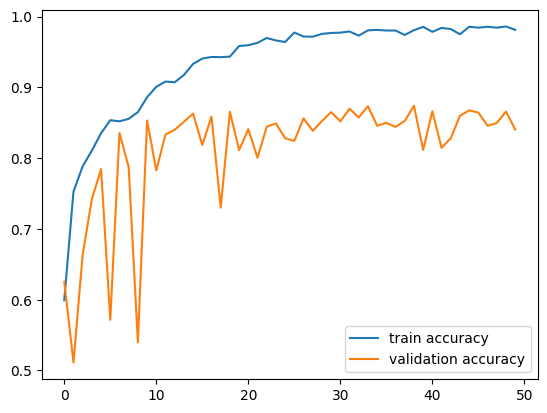

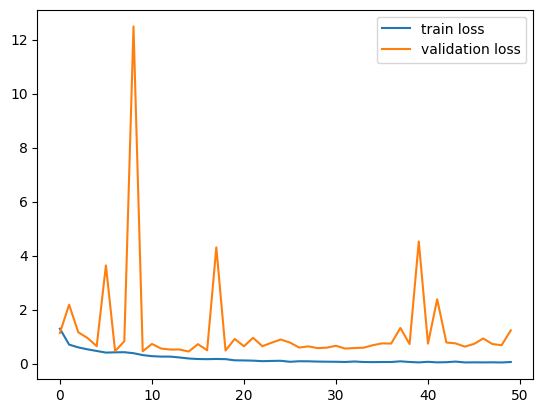

342/342 [==============================] - 5s 10ms/step
Accuracy: 0.8491896346488417
Precision: 0.8511464313386043
Recall: 0.8502715732350218
F1 Score: 0.8489993130670098
342/342 [==============================] - 3s 9ms/step


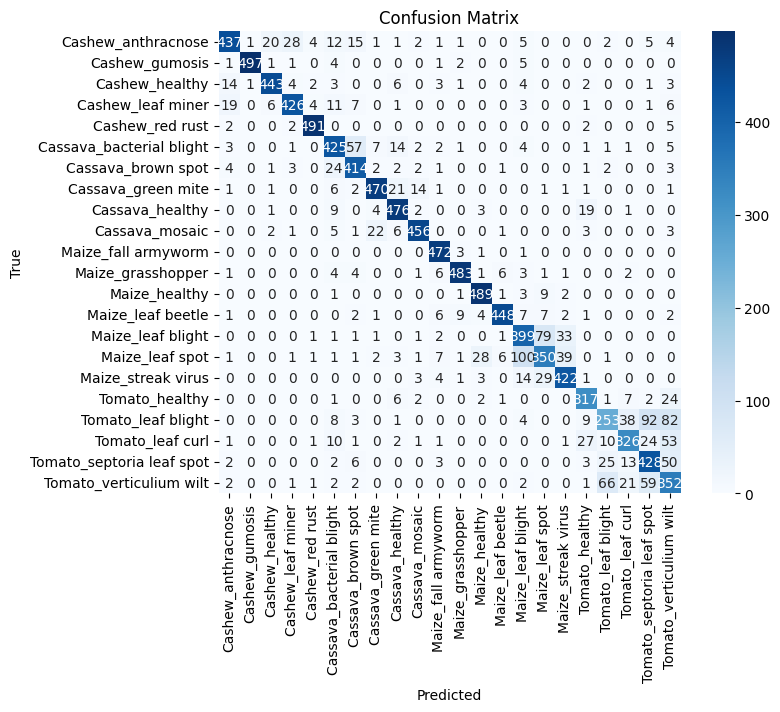

In [14]:
output_checking()

In [15]:
file_path = '/content/drive/MyDrive/Deep learning model/with scale data/scaling_inceptionv3_50epoch_84%acc.h5'
model.save(file_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
